# .......................................................MashaAllah............................................................................ 

# Tranning model for (CV)FruitClassification

# by: Abdullah and Bros

#ConvolutionNeuralNetwork #DeepLearning #MachineLearning #ComputerVission #ArtificialIntaligence #DataScience 

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 1. Check DataSet and defing constants

In [4]:
s = cv2.imread('../DATA/fruits-360_dataset/fruits-360/T&T/Training/Apple Braeburn/136_100.jpg')

In [5]:
s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)

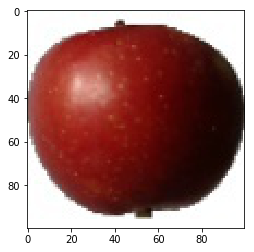

In [6]:
plt.imshow(s)

In [7]:
s.shape

(100, 100, 3)

# 2. Image Data Generator Obj creation ... for rescaling and stuff like that

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.3, height_shift_range=0.3,
            horizontal_flip=True, fill_mode='nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)
 

# 4. Building Model

In [10]:
from keras.models import Sequential

In [11]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [13]:
model = Sequential()

input_img_shape = (100,100,3)

# layer One convotutional layer
model.add( layer=Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape=input_img_shape) )
model.add( layer=Conv2D(filters=32, kernel_size=(3, 3), activation ='relu') )
model.add( layer=MaxPooling2D(pool_size=(2, 2),strides=2) )
model.add( layer=Dropout(rate=0.25) )

# layer two convotutional layer
model.add( layer=Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation = 'relu') )
model.add( layer=Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu') )
model.add( layer=MaxPooling2D(pool_size=(2, 2),strides=2) )
model.add( layer=Dropout(rate=0.25) )

# layer three flatten layer
model.add( layer=Flatten() )

# layer inter-connceted layer
model.add( layer=Dense(units=512, activation = 'relu') )
model.add( layer=Dropout(rate=0.5) )

# layer final
model.add( layer=Dense(units=120, activation = 'softmax') )

# 5. Bulit Model Summary 

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
__________

# 6. Compile Model 

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Activating Image Generator

*** Few constants ***

In [16]:
train_data_folder_path = '../DATA/fruits-360_dataset/fruits-360/T&T(custom)/Training'
test_data_folder_path = '../DATA/fruits-360_dataset/fruits-360/T&T/Test'

number_train_samples = 60498 
number_test_samples = 20622  
epochs = 1                      # change number of cycels here
input_img_shape = (100,100,3)
num_classes = 120
batch_size = 32

In [17]:
train_img_gen = train_datagen.flow_from_directory(train_data_folder_path, target_size=input_img_shape[:2], batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 60498 images belonging to 120 classes.


In [21]:
test_img_gen = test_datagen.flow_from_directory(test_data_folder_path, target_size=input_img_shape[:2],batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 20622 images belonging to 120 classes.


In [22]:
train_img_gen.batch_size

32

# 8. Classes we have

In [30]:
train_img_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Dates': 35,
 'Eggplant': 36,
 'Ginger Root': 37,
 'Granadilla': 38,
 'Grape Blue': 39,
 'Grape Pink': 40,
 'Grape White': 41,
 'Grape White 2': 42,
 'Grape White 3': 43,
 'Grape White 4': 44,
 'Grapefruit Pink': 45,
 'Grapefruit White': 46,
 'Guava': 47,
 'Hazelnut

# 9.Traning Model for 20 epochs

*** Shutting OFF warning because theu are kind of annoying ***

In [24]:
import warnings

In [25]:
warnings.filterwarnings('ignore')

*** fitting model ***

In [27]:
Results = model.fit_generator( generator=train_img_gen, steps_per_epoch =number_train_samples//batch_size, epochs = epochs, validation_data = test_img_gen, validation_steps = number_train_samples//batch_size)

Epoch 1/1
1528/1528 [==============================] - 1974s 1s/step - loss: 3.3443 - acc: 0.1443 - val_loss: 2.0327 - val_acc: 0.3496


# 9. Evoluating performance 

In [45]:
Results.history['acc']

NameError: name 'Results' is not defined

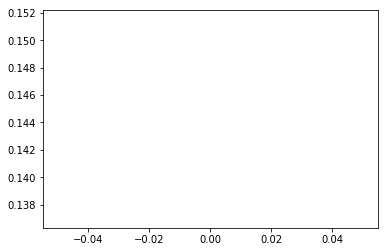

In [37]:
plt.plot(Results.history['acc'])

In [ ]:
# 10. Save and Load Model

In [41]:
from keras.models import load_model

In [42]:
model.save('Model3942b.h5') # change name here

In [43]:
#new_model = load_model('')

# 11. Testing Out the model on test pics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
nb_validation_samples // batch_size+1

514

In [97]:
#Confution Matrix and Classification Report
prededictions = model.predict_generator(test_img_gen, number_test_samples//batch_size+1)

In [ ]:
prededictions_alter = np.argmax(prededictions, axis=1)

*** some important fig***

test_img_gen.classes

In [93]:
#test_img_gen.n
#Y_pred.shape
#y_pred.shape

20622

In [102]:
class_labels = test_img_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}
target_names = list(class_labels.values())

In [100]:
print('Confusion Matrix')
print(confusion_matrix(test_img_gen.classes, prededictions_alter))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_img_gen.classes, prededictions_alter, target_names=target_names))

Confusion Matrix
[[ 79   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 163 ...   0   0   0]
 ...
 [  0   0  34 ...  10   0   0]
 [  0   0   0 ...   0 153   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.45      0.48      0.46       164
 Apple Crimson Snow       0.00      0.00      0.00       148
     Apple Golden 1       0.38      0.99      0.55       164
     Apple Golden 2       0.00      0.00      0.00       164
     Apple Golden 3       0.25      1.00      0.40       161
 Apple Granny Smith       0.37      1.00      0.54       164
    Apple Pink Lady       0.00      0.00      0.00       152
        Apple Red 1       0.00      0.00      0.00       164
        Apple Red 2       0.34      0.79      0.48       164
        Apple Red 3       0.00      0.00      0.00       144
Apple Red Delicious       0.02      0.01      0.01       166
 Apple Red Yellow 1       0.45      



# #####Stuff under construction

In [43]:
# 11. Predict new image

In [44]:
from keras.preprocessing import image 

In [32]:
tester_file = '../DATA/fruits-360_dataset/fruits-360/test-multiple_fruits/Bananas(lady_finger)5.jpg'

In [33]:
tester = image.load_img(tester_file,target_size=(100,100))

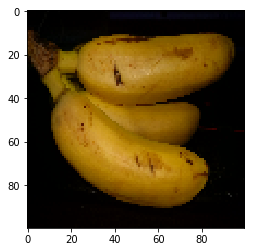

In [34]:
plt.imshow(tester)

In [35]:
tester = image.img_to_array(tester)
tester.shape

(100, 100, 3)

In [38]:
tested = np.expand_dims(tester,axis=0)
tested.shape

(1, 100, 100, 3)

In [39]:
tested = tested/255

In [41]:
model.predict_classes(tested)

array([115], dtype=int64)

In [42]:
model.predict(tested)

array([[0.00817704, 0.00882808, 0.00778997, 0.00833698, 0.00836551,
        0.00842895, 0.00832005, 0.00855029, 0.00802858, 0.00820642,
        0.00850474, 0.00834134, 0.00874808, 0.00781954, 0.0086142 ,
        0.00804932, 0.00819088, 0.00830893, 0.00839859, 0.00802899,
        0.00826176, 0.00819568, 0.00774709, 0.0084015 , 0.00851022,
        0.00844068, 0.00870879, 0.00861338, 0.00846119, 0.00793218,
        0.00824472, 0.00916474, 0.00791749, 0.00820433, 0.00832518,
        0.00829352, 0.00810518, 0.00857233, 0.00810604, 0.00847036,
        0.00835477, 0.00790437, 0.00821684, 0.00794022, 0.0081358 ,
        0.00803639, 0.0083198 , 0.00888282, 0.00817351, 0.00834121,
        0.00785948, 0.00792814, 0.00806264, 0.00862642, 0.00896246,
        0.00838896, 0.00820879, 0.00793662, 0.00863683, 0.00829157,
        0.00829963, 0.0087365 , 0.00764898, 0.00832181, 0.00827993,
        0.00833945, 0.00818137, 0.0082751 , 0.00852225, 0.00803747,
        0.00873537, 0.00811945, 0.0082402 , 0.00

# End

# A Projrct by M Abdullah Anwar ( 17K-3942 )